# Getting Started

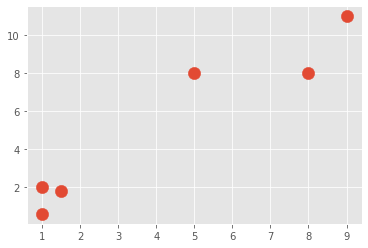

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
from sklearn import preprocessing

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = 10*["g","r","c","b","k"]

# K Means Class

In [2]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if abs(np.sum((current_centroid-original_centroid)/original_centroid*100.0)) > self.tol:
                    print(abs(np.sum((current_centroid-original_centroid)/original_centroid*100.0)))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

# Fitting

In [3]:
clf = K_Means()
clf.fit(X)

453.3333333333334
9.999999999999996
102.72108843537411


# Plotting Data Points and the Centroids

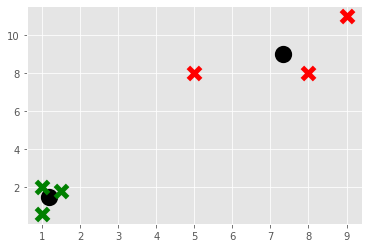

In [4]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

# Testing the Predictions

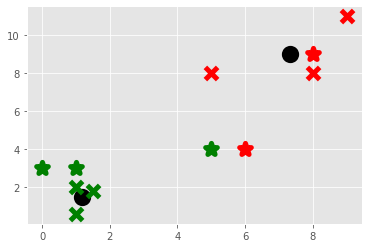

In [5]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

        
unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)


plt.show()

# Adding the Unknown dataset to the Original dataset to see what happens

484.7222222222223
13.0
52.10727969348656


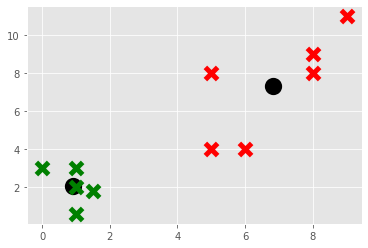

In [6]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [1,3],
              [8,9],
              [0,3],
              [5,4],
              [6,4],])

colors = 10*["g","r","c","b","k"]

class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

plt.show()

In [7]:
# Sure enough, while most featuresets kept their clusters, the featureset [5,4] changed groups when it was used for fitment.

# Testing our K-Means algorithm against the Titanic set, and compare our results to reality and Scikit-Learn's output

In [8]:
df = pd.read_excel(r"C:\Users\samer\Desktop\Machine Learning\Complementary Stuff\titanic.xls")
df.drop(['body','name'], 1, inplace=True)

print(df.head())
df.fillna(0,inplace=True)

   pclass  survived     sex      age  sibsp  parch  ticket      fare    cabin  \
0       1         1  female  29.0000      0      0   24160  211.3375       B5   
1       1         1    male   0.9167      1      2  113781  151.5500  C22 C26   
2       1         0  female   2.0000      1      2  113781  151.5500  C22 C26   
3       1         0    male  30.0000      1      2  113781  151.5500  C22 C26   
4       1         0  female  25.0000      1      2  113781  151.5500  C22 C26   

  embarked boat                        home.dest  
0        S    2                     St Louis, MO  
1        S   11  Montreal, PQ / Chesterville, ON  
2        S  NaN  Montreal, PQ / Chesterville, ON  
3        S  NaN  Montreal, PQ / Chesterville, ON  
4        S  NaN  Montreal, PQ / Chesterville, ON  


In [9]:
def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))

    return df

In [10]:
df = handle_non_numerical_data(df)
print(df.head())

# add/remove features just to see impact they have.
df.drop(['ticket','home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

   pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0       1         1    0  29.0000      0      0     755  211.3375    153   
1       1         1    1   0.9167      1      2     513  151.5500      7   
2       1         0    0   2.0000      1      2     513  151.5500      7   
3       1         0    1  30.0000      1      2     513  151.5500      7   
4       1         0    0  25.0000      1      2     513  151.5500      7   

   embarked  boat  home.dest  
0         3     2        275  
1         3    25         70  
2         3     0         70  
3         3     0         70  
4         3     0         70  


In [11]:
clf = K_Means()
clf.fit(X)

In [12]:
correct = 0
for i in range(len(X)):

    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction == y[i]:
        correct += 1


print(correct/len(X))

0.30710466004583653
